In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from scipy.ndimage import interpolation
import tensorflow as tf
from tensorflow.keras import layers
import math
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, Callback

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('Train dataset, missing values:', train_df.isna().sum().sum())
print('Test dataset, missing values:', test_df.isna().sum().sum())

Train dataset, missing values: 0
Test dataset, missing values: 0


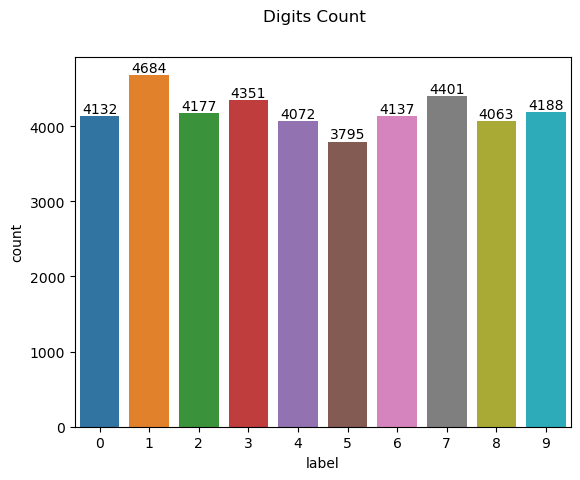

In [6]:
ax = sns.countplot(x = 'label', data = train_df)
ax.figure.suptitle('Digits Count')
for container in ax.containers:
    ax.bar_label(container)

In [7]:
y_train = train_df['label']
X_train = train_df.drop('label', axis = 1)

In [8]:
# from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='minority')
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# len(X_train), len(y_train)

# One-hot Encoding

In [9]:
y_train_oh = to_categorical(y_train, num_classes=10)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_oh, 
                                                  test_size=0.15, stratify = y_train_oh)

# Data Deskewing
the hand written digits can be skewed (they can be s), removing any skweness in the digits can improve our results

In [11]:
def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

In [12]:
X_full_deskewed = np.apply_along_axis(lambda x: deskew(x.reshape(28,28)), axis=1, 
                                      arr=X_train.astype(np.uint8).to_numpy()).astype('float32')

X_val_deskewed = np.apply_along_axis(lambda x: deskew(x.reshape(28,28)), axis=1, 
                                      arr=X_val.astype(np.uint8).to_numpy()).astype('float32')

X_test_deskewed = np.apply_along_axis(lambda x: deskew(x.reshape(28,28)), axis=1, 
                                      arr=test_df.astype(np.uint8).to_numpy()).astype('float32')

print(f"X_train_deskewed shape: {X_full_deskewed.shape}")
print(f"X_val_deskewed shape: {X_val_deskewed.shape}")
print(f"X_test_deskewed shape: {X_test_deskewed.shape}")

/tmp/ipykernel_32/133078494.py:19: DeprecationWarning: Please use `affine_transform` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  return interpolation.affine_transform(image,affine,offset=offset)


X_train_deskewed shape: (35700, 28, 28)
X_val_deskewed shape: (6300, 28, 28)
X_test_deskewed shape: (28000, 28, 28)


In [13]:
X_train = np.reshape(X_full_deskewed, (X_full_deskewed.shape[:3]) + (1,)) / 255
X_val = np.reshape(X_val_deskewed, (X_val_deskewed.shape[:3]) + (1,)) / 255
X_test = np.reshape(X_test_deskewed, (X_test_deskewed.shape[:3]) + (1,)) / 255

print(f'X_full shape. \t\tX: {X_train.shape}',
      f'\nX_val shape. \t\tX: {X_val.shape}',
      f'\nX_test shape. \t\tX: {X_test.shape}')

X_full shape. 		X: (35700, 28, 28, 1) 
X_val shape. 		X: (6300, 28, 28, 1) 
X_test shape. 		X: (28000, 28, 28, 1)


# Modeling

In [14]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [16]:
print(y_train.shape)
print(X_train.shape)

(35700, 10)
(35700, 28, 28, 1)


In [17]:
# Calculate the value counts of each class
value_counts = np.sum(y_train, axis=0)

# Calculate the inverse of the value counts
weights = 1.0 / value_counts

# Normalize the weights
weights /= np.sum(weights)

# Create a dictionary to hold the class weights
class_weights = {}
for i, weight in enumerate(weights):
    class_weights[i] = weight
    

In [18]:
earstop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5)

history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_val,y_val),
    callbacks = [earstop]
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1116/1116 [==============================] - 23s 20ms/step - loss: 0.1607 - accuracy: 0.9522 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 2/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 3/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0370 - val_accuracy: 0.9867
Epoch 4/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0376 - val_accuracy: 0.9884
Epoch 5/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0383 - val_accuracy: 0.9884
Epoch 6/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0319 - val_accuracy: 0.9906
Epoch 7/10
1116/1116 [==============================] - 21s 19ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0323 - val_accura

In [19]:
predictions = model.predict(X_test)

875/875 [==============================] - 5s 6ms/step


In [20]:
predictions

array([[1.4914088e-10, 4.7057660e-09, 9.9999171e-01, ..., 7.8192998e-06,
        7.9674663e-11, 2.7955172e-10],
       [9.9999994e-01, 1.1902143e-11, 5.0032058e-11, ..., 3.5895802e-09,
        5.4950122e-10, 3.7651282e-09],
       [6.8768054e-11, 3.3731769e-07, 3.4040454e-07, ..., 2.2686601e-07,
        1.3602444e-03, 9.9854583e-01],
       ...,
       [1.9755586e-22, 1.8792452e-16, 2.4447973e-16, ..., 2.0303190e-11,
        1.3087505e-16, 5.2137304e-13],
       [1.3884444e-12, 1.6539582e-09, 1.8503307e-11, ..., 5.6747589e-09,
        7.6554150e-09, 9.9995440e-01],
       [5.7558901e-12, 3.6561485e-08, 9.9996656e-01, ..., 1.9645209e-05,
        8.1645393e-09, 3.8927426e-09]], dtype=float32)

In [21]:
labels = []
predicted_classes = tf.argmax(predictions, axis=1)
for i, predicted_class in enumerate(predicted_classes):
    labels.append(predicted_class.numpy())
#     print("Image", i, "predicted class:", predicted_class)

In [22]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label'] = labels

In [23]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
submission.to_csv('my_submission3.csv', index = False)